# Overview

Here is a description of the data sets:

Response Database:  
* This file includes details on each individual commercial that aired on TV since 2014  and the attributed performance or responses for each commercial.. There is a field definition tab explaining what each variable means but I am happy to answer any questions about the data beyond the field definitions.

Database:  
* This data represents overall daily business performance for a different brand and should not be combined with the response database. 
* The data in this file is broken out into two types of variables– predictors or drivers, and outcomes. 
    * The spend variables would be the drivers and the purchases (in orange) are the outcomes or results that can be measured in concert with the spends and any relevant exogenous factors. 
    * The purchases can also be analyzed independently from the spends for insights into business growth, seasonality, etc.
    * Although the data has been recoded to protect the privacy of the advertiser, we can tell you that the directionality and the relationships over time and across variables have not been changed.  
    * We can also tell you that the advertiser is in the online travel category (think Kayak, Priceline, Expedia).

Exercise
* For the <b>response database</b>, the exercise is fairly open ended.  Our objective here is see how you approach a new data set. What insights can you derive pertaining to what drives website volume and what doesn’t? What approach do you take to gathering these insights with respect to tools/software, models, etc.?
* For the <b>database</b> part of the exercise, you might consider the following prompts to guide your analysis:
    - What are the most impactful drivers of total purchases?
    - If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
    - Can you quantify the longitudinal/compounding effect of marketing over time?
    - There are several periods of time in which there was no television advertising 
        – how would you measure the impact of the absence of TV? Are you able to quantify this?

While we’ve broken out purchases by new and returning and different vertical types, these are of secondary importance to total purchases. Any other insights you’d like to provide outside of these questions is welcomed. Additionally, you may use any of these data sets as a platform to discuss creative ideas around analysis broadly, even if you don’t have the time or resources to perform the analysis, ideas qualify as solid work product too.  

Please don’t hesitate to reach out with any questions about the data, the exercise, or the position. Please take this coming week with the data and send your insights in whatever format you like (Word, Email, Powerpoint, Tableau, etc.).

In [2]:
import sys

import pandas as pd
import seaborn.apionly as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import tqdm

# Read the data sets

In [3]:
database_raw = pd.read_excel(
    "data/Database.xlsx",
    header=[0, 1, 2]
)
database_raw.dtypes

                                                                                Date                               
MARKETING SPENDS WITH PARTNERS                Unnamed: 0_level_1                Remarketing Spend                      float64
                                              Unnamed: 1_level_1                Partner Search Spend                   float64
                                              Unnamed: 2_level_1                Partner A Hotel Spend                  float64
                                              Unnamed: 3_level_1                Partner B Hotel Spend                  float64
                                              Unnamed: 4_level_1                Partner C Hotel Spend                  float64
                                              Unnamed: 5_level_1                Other Partner Spend                    float64
                                              Unnamed: 6_level_1                Partner TOTAL                          flo

In [4]:
response_raw = (
    pd.read_excel(
        "data/Response Database.xlsx", 
        header=0
    )
    .iloc[:, :17]
)
response_raw.dtypes

Response                   int64
Date              datetime64[ns]
Time                      object
Network                   object
Daypart                   object
Rate                     float64
Imps (000)               float64
CPM                      float64
Property                  object
Start                     object
End                       object
Buy Type                  object
Length                    object
C/B/S                     object
Program                   object
Week of           datetime64[ns]
Creative Title            object
dtype: object

In [5]:
database_raw.head()

MARKETING SPENDS WITH PARTNERS                       \
                       Unnamed: 0_level_1   Unnamed: 1_level_1   
Date                    Remarketing Spend Partner Search Spend   
2015-01-01                       36813.64             39730.54   
2015-01-02                       41297.77             50297.34   
2015-01-03                       37550.40             39719.12   
2015-01-04                       39006.15             40016.30   
2015-01-05                       35591.18             56930.77   

                                                                              \
              Unnamed: 2_level_1    Unnamed: 3_level_1    Unnamed: 4_level_1   
Date       Partner A Hotel Spend Partner B Hotel Spend Partner C Hotel Spend   
2015-01-01              28657.73              25030.39              12503.82   
2015-01-02              33937.95              34147.43              14660.26   
2015-01-03              30088.45              38768.40              11431.65   
2015-01-04              32730.76              38668.44              13072.17   
2015-01-05              32376.76              35723.47              23534.97   

                                                   \
            Unnamed: 5_level_1 Unnamed: 6_level_1   
Date       Other Partner Spend      Partner TOTAL   
2015-01-01            16259.28          158995.40   
2015-01-02            22460.13          196800.88   
2015-01-03            24716.81          182274.83   
2015-01-04            18327.53          181821.35   
2015-01-05            23711.85          207869.00   

           MARKETING SPENDS WITH AFFILIATES                                \
                         Unnamed: 7_level_1            Unnamed: 8_level_1   
Date         Affiliate Standard Hotel Spend Affiliate Premium Hotel Spend   
2015-01-01                         14095.02                      11951.52   
2015-01-02                         17634.10                      15081.16   
2015-01-03                         14781.58                      11972.12   
2015-01-04                         14831.60                      13526.64   
2015-01-05                         18945.79                      18465.50   

                                                ...           \
                    Unnamed: 9_level_1          ...            
Date       Affiliate Other Hotel Spend          ...            
2015-01-01                     8864.16          ...            
2015-01-02                    10087.10          ...            
2015-01-03                     8895.49          ...            
2015-01-04                     9380.47          ...            
2015-01-05                    10820.58          ...            

                OUTCOME VARIABLE: PURCHASES                               \
           NEW CUSTOMER vs REPEAT CUSTOMERS                                
Date          New Customer Flight Purchases New Customer Hotel Purchases   
2015-01-01                             3998                         9598   
2015-01-02                             4859                        11775   
2015-01-03                             4156                         9834   
2015-01-04                             4304                         8616   
2015-01-05                             5762                         9059   

                                                                             \
                                                                              
Date       Repeat Customer Flight Purchases Repeat Customer Hotel Purchases   
2015-01-01                             5338                           26032   
2015-01-02                             6996                           31122   
2015-01-03                             5765                           25794   
2015-01-04                             5880                           22308   
2015-01-05                             8418                           26528   

                                            

In [6]:
response_raw.head()

,Response,Date,Time,Network,Daypart,Rate,Imps (000),CPM,Property,Start,End,Buy Type,Length,C/B/S,Program,Week of,Creative Title
0,12,2014-02-17,06:46:00,TBS,Morning,1725.20,278.0,6.205755,DAYTIME,06:00:00,15:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga
1,0,2014-02-17,08:35:00,ESPNEWS,Morning,82.65,24.0,3.443750,Day,06:00:00,18:00:00,PE,30,NatCbl,NaN,2014-02-17,Sauna
2,0,2014-02-17,08:56:00,DIY,Morning,110.20,13.0,8.476923,Morning Rotation M-F 7:0,07:00:00,09:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
3,5,2014-02-17,09:16:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
4,22,2014-02-17,09:51:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga


In [7]:
database_cleaned = (
    pd.read_excel(
        "data/Database.xlsx",
        header=[2]
    )
    .reset_index(drop=True)
    .rename({"index" : "Date"})
)
database_cleaned["TV TOTAL"] = database_cleaned["TV Campaign 1"] +\
database_cleaned["TV Campaign 2"] +\
database_cleaned["TV Campaign 3"]
database_cleaned["TV Present"] = pd.Categorical(database_cleaned["TV TOTAL"] > 0).labels

C:\Users\Ulric\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: 'labels' is deprecated. Use 'codes' instead


In [8]:
database_cleaned["year"] = database_cleaned["Date"].apply(lambda x: x.year)
database_cleaned["month"] = database_cleaned["Date"].apply(lambda x: x.month)
database_cleaned["day"] = database_cleaned["Date"].apply(lambda x: x.day)
database_cleaned["unix_second"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9)
database_cleaned["unix_second_normed"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9 - min(database_cleaned["unix_second"]) )


# Database data set questions

* What are the most impactful drivers of total purchases?
* If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
* Can you quantify the longitudinal/compounding effect of marketing over time?
* There are several periods of time in which there was no television advertising 
    * how would you measure the impact of the absence of TV? Are you able to quantify this?

### check for autocorrelation

* http://www.statsref.com/HTML/index.html?arima.html
* https://people.duke.edu/~rnau/411arim3.htm

acf
* Gradual decrease suggests trend component (data is not stationary)
    * differencing required first
pacf
* spikes at lags 1, 3, 6, 7
    * suggest an autoregressive component of order 7 (p=7)
    
    
Seasonal pdqs
* Seasonal parameters are multiplied with the corresponding pdq parameters
* When fitting a time series with a strong seasonal pattern, you generally should try
    * ARIMA(0,1,q)(0,1,1) model (q=1 or 2)
    * ARIMA(p,0,0)(0,1,1)+c model (p=1, 2 or 3)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

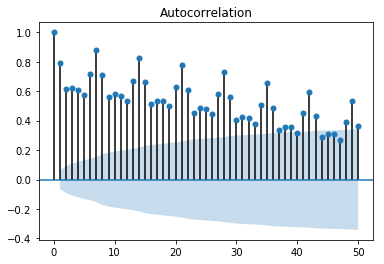

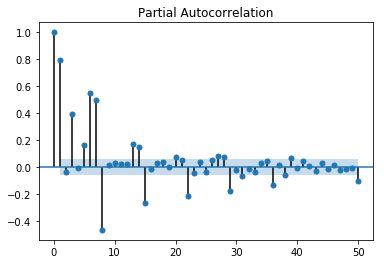

In [10]:
_ = plot_acf(database_cleaned["Total Hotel Purchases"], lags=50)
_ = plot_pacf(database_cleaned["Total Hotel Purchases"], lags=50)

### Fit Time series

(p, d, q) are the 
* p = AR order (autocorrelation)
    * coefficients for time lag terms
* d = the degree of differencing, 
* q = the Moving average order
    * coefficients for lagged error terms

# Annual

In [12]:
gsDiffResults = gridSearchTimeSeries(
    database_cleaned,
    pList=range(0,8), 
    dList = range(0, 3), 
    qList = [0],
    s_pList=range(1, 8), 
    s_dList = range(0, 3), 
    s_qList = range(0, 3), 
    s_sList = [0, 4, 12, 30], 
    trendList = [0, 1, 2], 
)

pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (1, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pd

pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (2, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal p

pdq = (0, 0, 0)
seasonal pdqs = (4, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (4, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 0, 0)
seasonal pdqs = (4, 1, 1, 0)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (2, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal p

pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (3, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal p

pdq = (0, 1, 0)
seasonal pdqs = (5, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (5, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 1, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (3, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal 

pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (4, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pd

pdq = (0, 2, 0)
seasonal pdqs = (6, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (6, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (6, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (6, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (0, 2, 0)
seasonal pdqs = (6, 1, 1, 4)
Unexpected error: <class 'AttributeError'>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (3, 2, 1, 12)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (5, 1, 2, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (7, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (7, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (7, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (7, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 0, 0)
seasonal pdqs = (7, 0, 1, 30)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal 

pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (6, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal p

pdq = (1, 1, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 1, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (4, 2, 2, 3

pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal pdqs = (6, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (1, 2, 0)
seasonal p

pdq = (2, 0, 0)
seasonal pdqs = (1, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (1, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (5, 2, 1, 4)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 0, 0)
seasonal pdqs = (7, 1, 1, 30)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (2, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (2, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (2, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (2, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (2, 0, 1, 30)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


seasonal pdqs = (6, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 1, 0)
seasonal pdqs = (6, 1, 2, 3

pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal p

pdq = (2, 2, 0)
seasonal pdqs = (2, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (2, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (2, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (3, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (3, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (2, 2, 0)
seasonal pdqs = (7, 1, 0, 30)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (2, 0, 1, 4)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (3, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (3, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (3, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 0, 0)
seasonal pdqs = (7, 2, 2, 12)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (4, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (4, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (4, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (4, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 1, 0)
seasonal pdqs = (4, 0, 2, 30)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (1, 2, 0, 

pdq = (3, 2, 0)
seasonal pdqs = (3, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (3, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pd

pdq = (3, 2, 0)
seasonal pdqs = (5, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (5, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (3, 2, 0)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


<class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (2, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pd

Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (4, 0, 2, 30)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (5, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 0, 0)
seasonal pdqs = (5, 2, 2, 30)
Unexpected error: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (3, 1, 0, 30)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (5, 0, 1, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (6, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (6, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (6, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (6, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 1, 0)
seasonal pdqs = (6, 2, 1, 0)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (4, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal p

pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (5, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pd

pdq = (4, 2, 0)
seasonal pdqs = (7, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (7, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (7, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (7, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (4, 2, 0)
seasonal pdqs = (7, 1, 2, 12)
Unexpected error: <class 'AttributeError'>


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (4, 1, 2,

pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (6, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal p

pdq = (5, 0, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (7, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 0, 0)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (5, 0, 1, 30)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 1, 0)
seasonal pdqs = (6, 2, 2, 4)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (1, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (1, 1, 2, 4)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (6, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal 

pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pdqs = (7, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (5, 2, 0)
seasonal pd

pdq = (6, 0, 0)
seasonal pdqs = (2, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (2, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


 <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 0, 0)
seasonal pdqs = (7, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
p

Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (1, 2, 1, 4)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (3, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (3, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (3, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (3, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (3, 1, 1, 0)
Unexpected error:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 1, 0)
seasonal pdqs = (7, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (1, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (1, 0, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal 

pdq = (6, 2, 0)
seasonal pdqs = (2, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 1, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (2, 2, 0, 12)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pd

pdq = (6, 2, 0)
seasonal pdqs = (4, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (4, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (4, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (4, 1, 0, 4)
Unexpected error: <class 'AttributeError'>
pdq = (6, 2, 0)
seasonal pdqs = (4, 1, 0, 4)
Unexpected error: <class 'AttributeError'>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


 <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 12)
Unexpected error: <class 'AttributeError'>
p

Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 0, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (3, 1, 0, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (4, 2, 2, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (4, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (4, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (4, 2, 2, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 0, 0)
seasonal pdqs = (5, 0, 0, 0)
Unexpected error:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 30)
Unexpected error: <class 'A

Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (4, 0, 2, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (5, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (5, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (5, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (5, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 1, 0)
seasonal pdqs = (5, 2, 2, 0)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 0, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (3, 0, 1, 30)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 4)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 12)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (4, 2, 2, 0)
Unexpected error: <class '

Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (6, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (6, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (6, 1, 1, 30)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (6, 1, 2, 0)
Unexpected error: <class 'AttributeError'>
pdq = (7, 2, 0)
seasonal pdqs = (6, 1, 2, 0)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


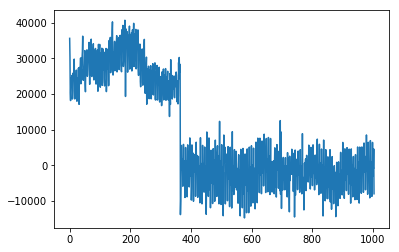

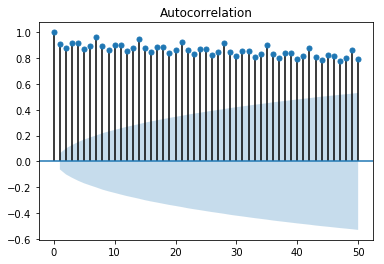

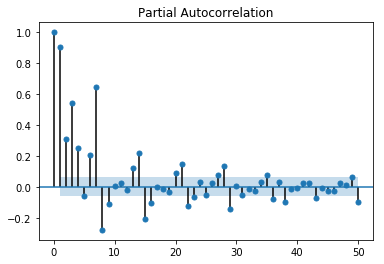

In [48]:
diffModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (1, 0, 0), # p, q
            seasonal_order=(0, 1, 0, 365),
            trend = "n",
            exog= None,
        ).fit()
diffModel

_= sns.plt.plot(range(len(diffModel.resid)), diffModel.resid)
_= plot_acf(diffModel.resid, lags=50)
_ = plot_pacf(diffModel.resid, lags=50)

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                            
Dep. Variable:     Total Hotel Purchases   No. Observations:                 1004
Model:                  SARIMAX(7, 1, 7)   Log Likelihood               -9090.732
Date:                   Sat, 17 Mar 2018   AIC                          18213.465
Time:                           13:37:47   BIC                          18292.053
Sample:                       01-01-2015   HQIC                         18243.328
                            - 09-30-2017                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0439      0.185     -0.237      0.812      -0.407       0.319
ar.L1         -0.4234      0.071     -5.939      0.000      -0.563      -0.284
ar.L2         -0.4332      0

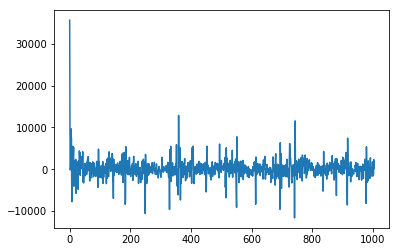

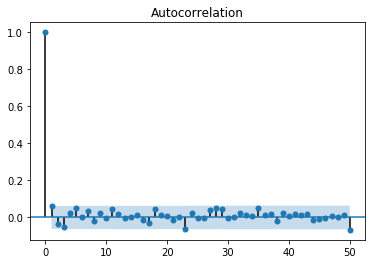

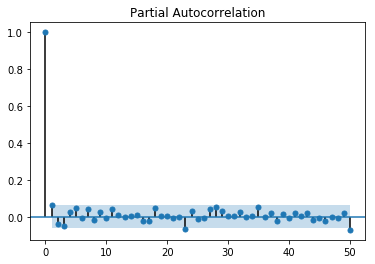

In [103]:
diffModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (7, 1, 7), # p, q
            seasonal_order=(0, 0, 0, 0),
            trend = "t",
            exog= None,
        ).fit()
diffModel

_= sns.plt.plot(range(len(diffModel.resid)), diffModel.resid)
_= plot_acf(diffModel.resid, lags=50)
_ = plot_pacf(diffModel.resid, lags=50)
print(diffModel.summary())

# Weekly cycles

Weekly ARIMA seems to do a good job of eliminating autocorrelation

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                            
Dep. Variable:     Total Hotel Purchases   No. Observations:                 1004
Model:                  SARIMAX(7, 1, 7)   Log Likelihood               -9091.129
Date:                   Sat, 17 Mar 2018   AIC                          18212.259
Time:                           13:12:38   BIC                          18285.935
Sample:                       01-01-2015   HQIC                         18240.255
                            - 09-30-2017                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4250      0.073     -5.852      0.000      -0.567      -0.283
ar.L2         -0.4345      0.070     -6.231      0.000      -0.571      -0.298
ar.L3         -0.4240      0

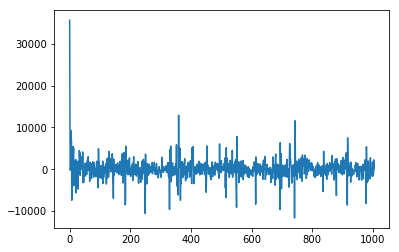

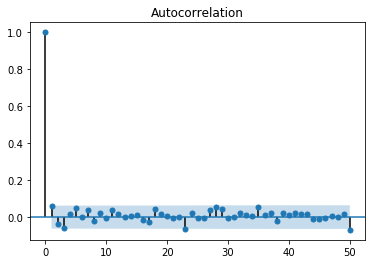

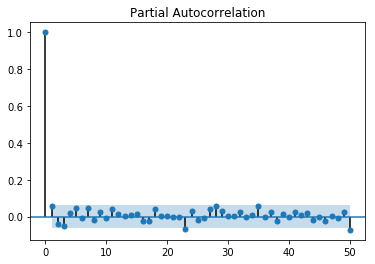

In [72]:
diffModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (7, 1, 7), # p, q
            seasonal_order=(0, 0, 0, 0),
            trend = "",
            exog= None,
        ).fit()
diffModel

_= sns.plt.plot(range(len(diffModel.resid)), diffModel.resid)
_= plot_acf(diffModel.resid, lags=50)
_ = plot_pacf(diffModel.resid, lags=50)
print(diffModel.summary())

acf
* Autocorrelation at lag 2,5, 7
    * seasonal
pacf
* tails off gradually
    * suggests MA component

# Brute force exploration

In [106]:
def gridSearchTimeSeries(
        df, 
        pList, 
        dList, 
        qList, 
        s_pList, 
        s_dList, 
        s_qList, 
        s_sList, 
        trendList, 
        covariateList=None,
        maxiter=50
    ):
    
    results = []
    for p in tqdm.tqdm_notebook(pList, desc="p"):
        for d in dList:
            for q in qList:
                for s_p in s_pList:
                    for s_d in s_dList:
                        for s_q in s_qList:
                            for s_s in s_sList:
                                for trend in trendList:
                                    print("pdq = (%i, %i, %i)" % (p, d, q))
                                    print("seasonal pdqs = (%i, %i, %i, %i)" % (s_p, s_d, s_q, s_s))
                                    print("trend = %s" % trend)
                                    
                                    try:
                                        model = sm.tsa.SARIMAX(
                                            endog = df.set_index("Date")["Total Hotel Purchases"].astype(float), 
                                            order = (p, d, q), # p, q
                                            seasonal_order=(s_p, s_d, s_q, s_s),
                                            trend = trend,
                                            exog= df.loc[:,
                                                        covariateList
                                            ] if covariateList else None,
                                            dates = df["Date"],
                                            freq=None
                                        )

                                        fittedModel = model.fit(maxiter=maxiter, full_output=True)

                                        results.append(
                                            (p, d, q, 
                                             s_p, s_d, s_q, s_s,
                                             trend,
                                             fittedModel.llf, fittedModel.aic, fittedModel.bic, fittedModel.hqic)
                                        )
                                    except ValueError as vErr:
                                        print("Error: {0}".format(vErr))
                                    except:
                                        print ("Unexpected error:", sys.exc_info()[0])
                                        pass
                    
            
    return pd.DataFrame(results, columns=[
        "p", "d","q", 
        "s_p", "s_d","s_q", "s_s" ,
        "trend",
        "llf", "aic", "bic", "hqic"])

In [107]:
gridSearchResults = gridSearchTimeSeries(
    df= database_cleaned,
    pList=[1, 7], 
    dList = range(0, 3), 
    qList = [0, 1, 7],
    s_pList=[0,1], 
    s_dList = [0, 1], # max of 1
    s_qList = [0, 1], # max of 1
    s_sList = [0, 1, 7], # seasonal period
    trendList = ['n','c','t','ct'], 
)

pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 0)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 0, 7)
trend = ct



Exception in thread Thread-14:
Traceback (most recent call last):
  File "C:\Users\Ulric\Anaconda3\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\Users\Ulric\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\Ulric\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 1, 0, 0)
tre

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (1, 0,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 1, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (0, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dim

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (1, 2, 2, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters f

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` se

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameter

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t
pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 1)
seasonal pdqs = (0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 0)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameter

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 7)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 7)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (1, 2, 2, 7)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = c
Error: Non-stationary starting au

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters f

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = ct
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = n
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 1)


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = ct
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = c
pdq = (1, 1,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (1, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = ct
pdq = (1, 1, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (1, 1,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = c
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = n
pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = n
pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = t
pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = n
pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = t
pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 1, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 1, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (0, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2-

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 1, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 1, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2-

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 1, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 1, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 1, 7)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2-

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 0)
seasonal pdqs = (0, 0, 2, 1)
t

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (1, 2,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (1, 2, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (1, 2, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters f

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = c
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = c
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = c
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set t

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set t

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set t

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = n
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = ct
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = c
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with 

seasonal pdqs = (0, 1, 1, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensiona

seasonal pdqs = (1, 0, 0, 0)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invert

seasonal pdqs = (1, 1, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimens

seasonal pdqs = (2, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_inverti

seasonal pdqs = (2, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (1, 2, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforc

Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 0, 7)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = t
Error: Non-stationary sta

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = t
pdq = (7, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 1, 7)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (0, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasona

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (7, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (7, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 7)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 7)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (1, 2, 2, 7)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = n
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = n
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 1)


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (7, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 0, 7)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = t
pdq = (7, 0, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = n
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 1)


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = ct
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
se

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

seasonal pdqs = (1, 0, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = n
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = t
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = n
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = c
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = t
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 0)
tr

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 0, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = t
pdq = (7, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameter

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = t
pdq = (7, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (7, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (7, 1, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct
Unexpected error: <class 'numpy.linalg.linalg.LinAlgError'>
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibili

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 0, 1)
tr

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 0, 7)
trend = ct
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enfor

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = n
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = c
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 0, 7)
trend = ct
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 1, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 0, 7)
trend = ct
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 1)
tr

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 1, 7)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: non-invertible starting MA parameters fou

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 1, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = t
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 0)
trend = ct
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 1)
trend = c
Error: non-invertible starting seasonal mov

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 0, 2, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (7, 2,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameter

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (0, 2, 0, 7)
trend = t
pdq = (7, 2, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 1, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 0, 2, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 0, 7)
trend = c
pdq = (7, 2,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error:

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (7, 2, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: array must not contain infs or NaNs
pdq = (7, 2, 0)
seasonal pdqs = (1, 2, 2, 1)
trend = ct
Error: array must not contain infs or NaNs
pdq = 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 0)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 0, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 0)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 0, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 0, 7)
trend = t
pdq = (7, 2, 

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = n


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 1)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = n
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = c
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 0, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
pdq = (7,

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = t
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 1, 7)
trend = ct
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: array must not contain infs or NaNs
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: array must not contain infs or NaNs
pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: array must not contain infs or

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 0)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 0, 0, 1)


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = c
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (0, 2, 1, 1)
trend = t
Error: Non-stationary star

Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 1)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 0, 2, 7)
trend = c
Error: Non-stationary starting autoregressive

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = t
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = t
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = t
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (1, 2, 2, 1)
trend = t
Error: Non-stationary star

Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = t
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 1)
trend = ct
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = n
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 1, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 0, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 1, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = n
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = c
Error: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 1)
trend = t
Error: Non-stationary star

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = c


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = t


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 1)
seasonal pdqs = (2, 2, 2, 7)
trend = ct


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 0)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with 

seasonal pdqs = (0, 1, 1, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (0, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensiona

seasonal pdqs = (1, 0, 0, 0)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 0)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 0, 0, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invert

seasonal pdqs = (1, 1, 1, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (1, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimens

seasonal pdqs = (2, 0, 0, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = t
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 1)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = c
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 0, 0, 7)
trend = t
Error: non-invertible starting MA parameters found with `enforce_inverti

seasonal pdqs = (2, 1, 1, 7)
trend = ct
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = n
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = c
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = t
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 0)
trend = ct
Error: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = n
Error: non-invertible starting MA parameters found with `enforce_invertibility` set to True.
pdq = (7, 2, 7)
seasonal pdqs = (2, 1, 2, 1)
trend = c
Error: non-invertible starting MA parameters found with `enforc

In [108]:
gridSearchResults.to_pickle("./data/grid_search_time_only.pkl")

In [111]:
gridSearchResults.shape

(2552, 12)

In [110]:
gridSearchResults.sort_values("hqic").head()

,p,d,q,s_p,s_d,s_q,s_s,trend,llf,aic,bic,hqic
1492,7,0,0,1,1,1,7,n,-8999.374701,18018.749402,18067.866875,18037.413852
1429,7,0,0,0,1,1,7,n,-9002.793168,18023.586336,18067.792062,18040.384341
1494,7,0,0,1,1,1,7,t,-8999.287880,18020.575761,18074.604981,18041.106655
1551,7,0,0,2,1,1,7,n,-8999.359801,18020.719601,18074.748822,18041.250496
872,1,1,1,1,1,1,7,n,-9011.049169,18032.098337,18056.657074,18041.430562


In [1]:
print(database_cleaned["Date"].min(), database_cleaned["Date"].max())

NameError: name 'database_cleaned' is not defined

In [42]:
gridSearchResults.sort_values("hqic").head()

,p,d,q,llf,aic,bic,hqic
60,7,2,1,-9194.038204,18408.076408,18457.173940,18426.735086
61,7,2,2,-9193.094507,18408.189014,18462.196300,18428.713560
56,7,1,0,-9198.525043,18415.050085,18459.246843,18431.845495
57,7,1,1,-9197.558267,18415.116534,18464.224042,18433.778100
58,7,1,2,-9196.963605,18415.927211,18469.945469,18436.454933


In [24]:
# sns.heatmap(
#     gridSearchResults.pivot(index="p", columns=["q"], values = "hqic")
# )
# # gridSearchResults.sort_values("hqic")

# Fit best base model

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:             Total Hotel Purchases   No. Observations:                 1004
Model:             SARIMAX(7, 0, 0)x(1, 1, 1, 7)   Log Likelihood               -8999.375
Date:                           Sat, 17 Mar 2018   AIC                          18018.749
Time:                                   16:53:51   BIC                          18067.867
Sample:                               01-01-2015   HQIC                         18037.414
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7336      0.021     34.703      0.000       0.692       0.775
ar.L2         -0.0657      0.031     -2.112

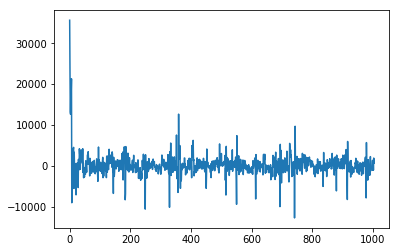

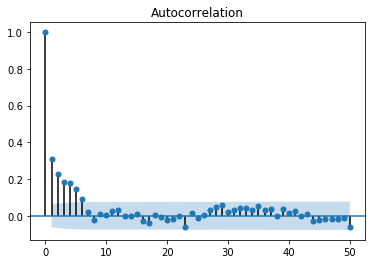

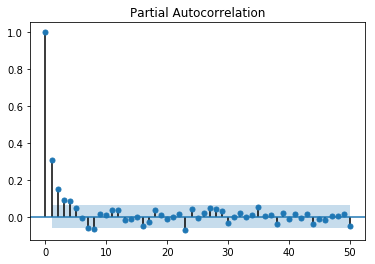

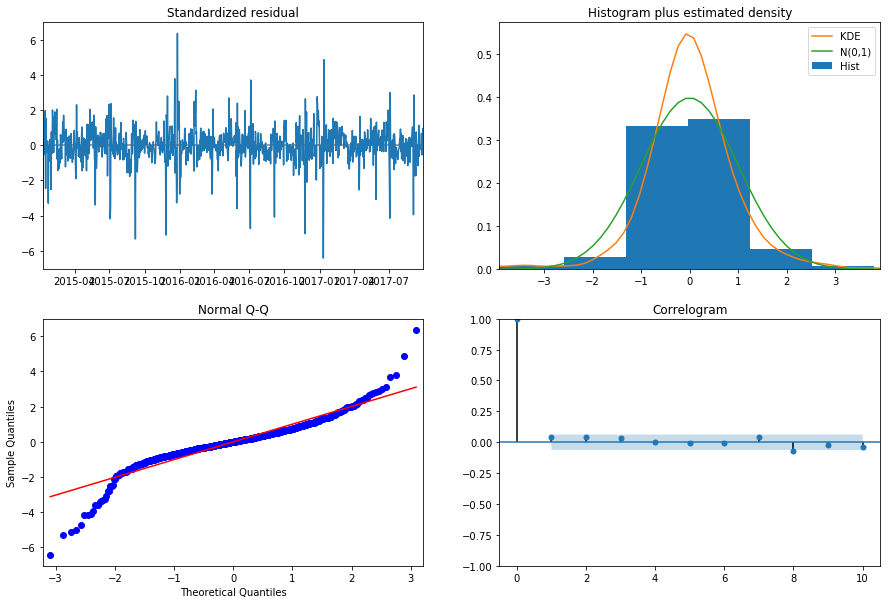

In [124]:
tsBaseModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (7, 0, 0), # p, d, q
            seasonal_order=(1, 1, 1, 7),
            trend = "n",
            exog= None,
        ).fit()
_= sns.plt.plot(range(len(tsBaseModel.resid)), tsBaseModel.resid)
_= plot_acf(tsBaseModel.resid, lags=50)
_ = plot_pacf(tsBaseModel.resid, lags=50)
_ = tsBaseModel.plot_diagnostics(figsize = (15, 10))
print(tsBaseModel.summary())

                                 Statespace Model Results                                
Dep. Variable:             Total Hotel Purchases   No. Observations:                 1004
Model:             SARIMAX(0, 1, 4)x(1, 1, 1, 7)   Log Likelihood               -9004.905
Date:                           Sat, 17 Mar 2018   AIC                          18023.810
Time:                                   17:03:16   BIC                          18058.192
Sample:                               01-01-2015   HQIC                         18036.875
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1607      0.020     -8.096      0.000      -0.200      -0.122
ma.L2         -0.1863      0.021     -9.007

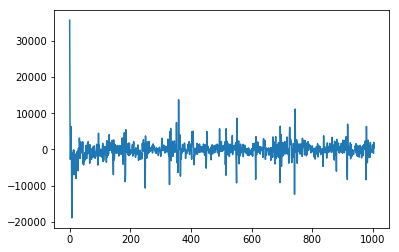

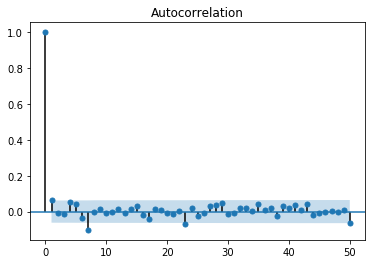

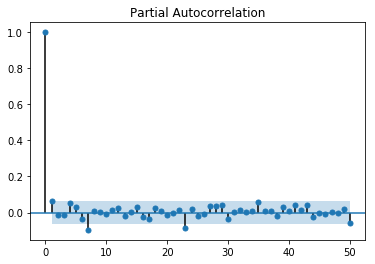

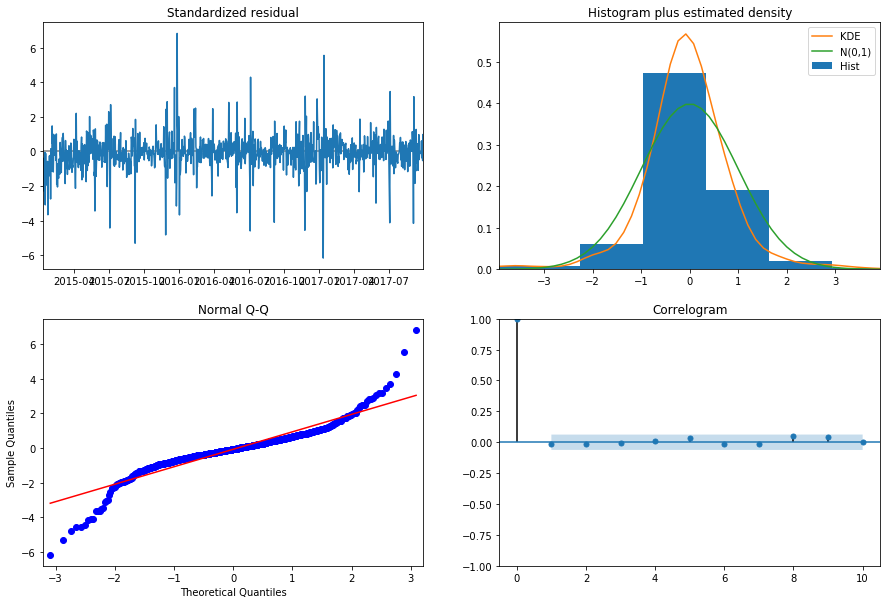

In [142]:
tsBaseModel2 = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (0, 1, 4), # p, d, q
            seasonal_order=(1, 1, 1, 7),
            trend = "n",
            exog= None,
        ).fit()
_= sns.plt.plot(range(len(tsBaseModel2.resid)), tsBaseModel2.resid)
_= plot_acf(tsBaseModel2.resid, lags=50)
_ = plot_pacf(tsBaseModel2.resid, lags=50)
_ = tsBaseModel2.plot_diagnostics(figsize = (15, 10))
print(tsBaseModel2.summary())

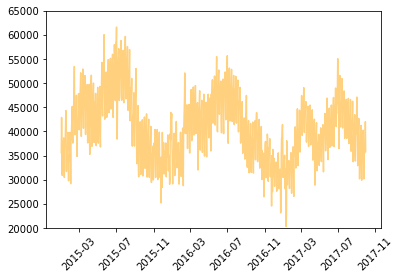

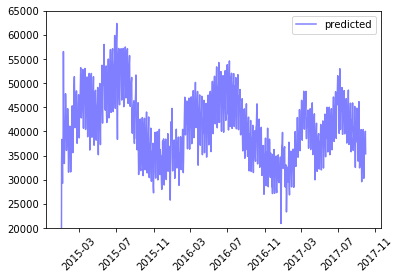

In [161]:
sns.plt.figure()
sns.plt.plot(
    database_cleaned["Date"],
    database_cleaned["Total Hotel Purchases"],
    alpha = 0.5,
    label = "observed",
    color= "orange"
)
sns.plt.xticks(rotation=45)
sns.plt.ylim(20000, 65000)
sns.plt.show()

sns.plt.plot(
    tsBaseModel2.predict(
        start = database_cleaned["Date"].min().strftime("%Y-%m-%d"),
        end = (database_cleaned["Date"].max() + pd.Timedelta(0, unit="D")).strftime("%Y-%m-%d")
    ),
    label = "predicted",
    alpha = 0.5,
    color="blue"
)
sns.plt.xticks(rotation=45)
sns.plt.ylim(20000, 65000)
sns.plt.legend(loc="best")

sns.plt.show()

# Add high level covariates

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:             Total Hotel Purchases   No. Observations:                 1004
Model:             SARIMAX(0, 1, 4)x(1, 1, 1, 7)   Log Likelihood               -8755.717
Date:                           Sat, 17 Mar 2018   AIC                          17533.434
Time:                                   17:18:35   BIC                          17587.463
Sample:                               01-01-2015   HQIC                         17553.965
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Partner TOTAL       0.0081      0.003      2.858      0.004       0.003       0.014
Affiliate TOTAL     0.0626  

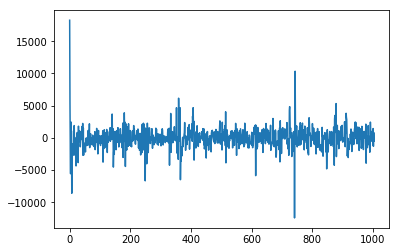

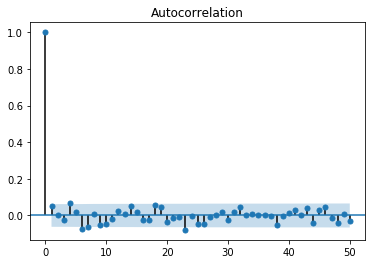

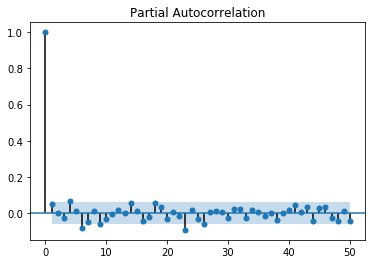

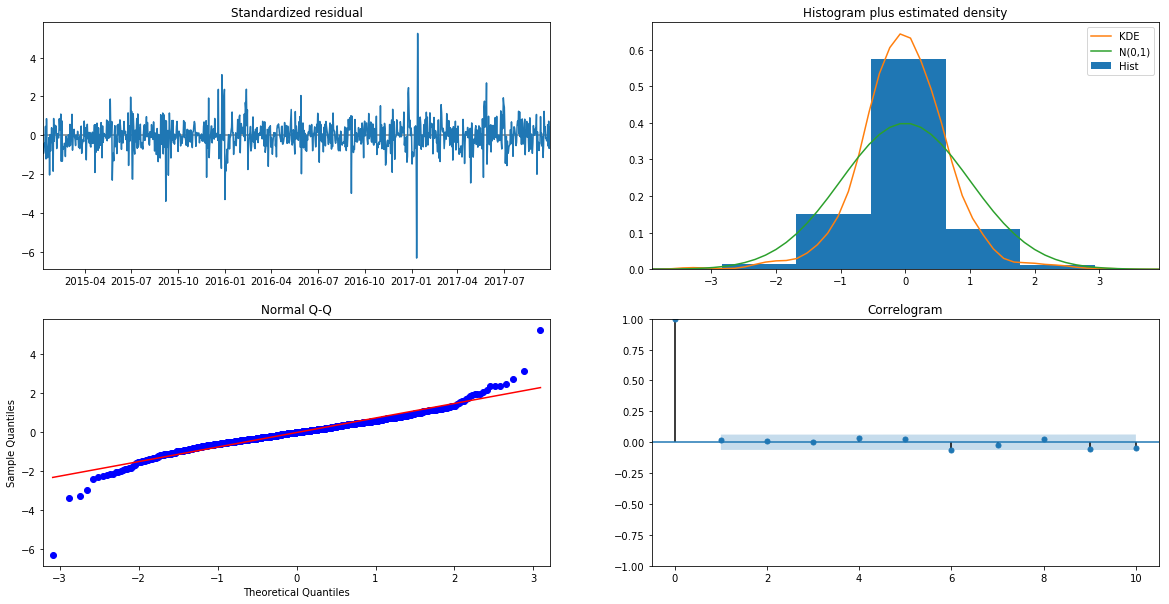

In [171]:
covarModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (0, 1, 4), # p, d, q
            seasonal_order=(1, 1, 1, 7),
            trend = "n",
            exog= database_cleaned.set_index("Date")
            .loc[:, 
                 [
                    'Partner TOTAL',
                    'Affiliate TOTAL',
                    'Search TOTAL',
                    'TV TOTAL'
                ]
            ].astype(float), 
        ).fit()
_= sns.plt.plot(range(len(covarModel.resid)), covarModel.resid)
_= plot_acf(covarModel.resid, lags=50)
_ = plot_pacf(covarModel.resid, lags=50)
_ = covarModel.plot_diagnostics(figsize = (20, 10))
print(covarModel.summary())

# TV contribution model

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:             Total Hotel Purchases   No. Observations:                 1004
Model:             SARIMAX(0, 1, 4)x(1, 1, 1, 7)   Log Likelihood               -8751.898
Date:                           Sat, 17 Mar 2018   AIC                          17529.796
Time:                                   17:20:33   BIC                          17593.648
Sample:                               01-01-2015   HQIC                         17554.059
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Partner TOTAL       0.0081      0.003      2.899      0.004       0.003       0.014
Affiliate TOTAL     0.0641  

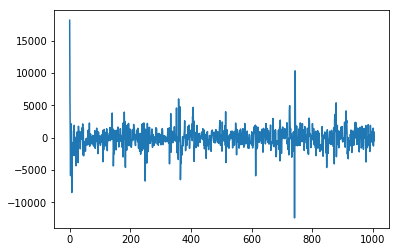

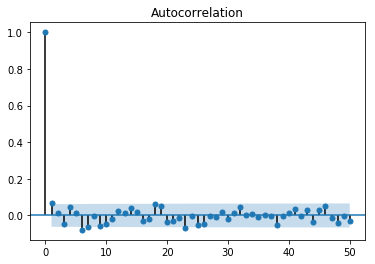

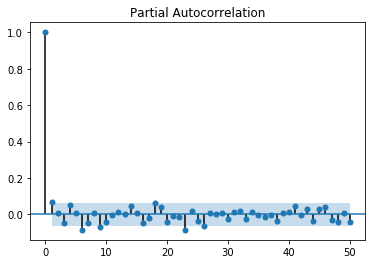

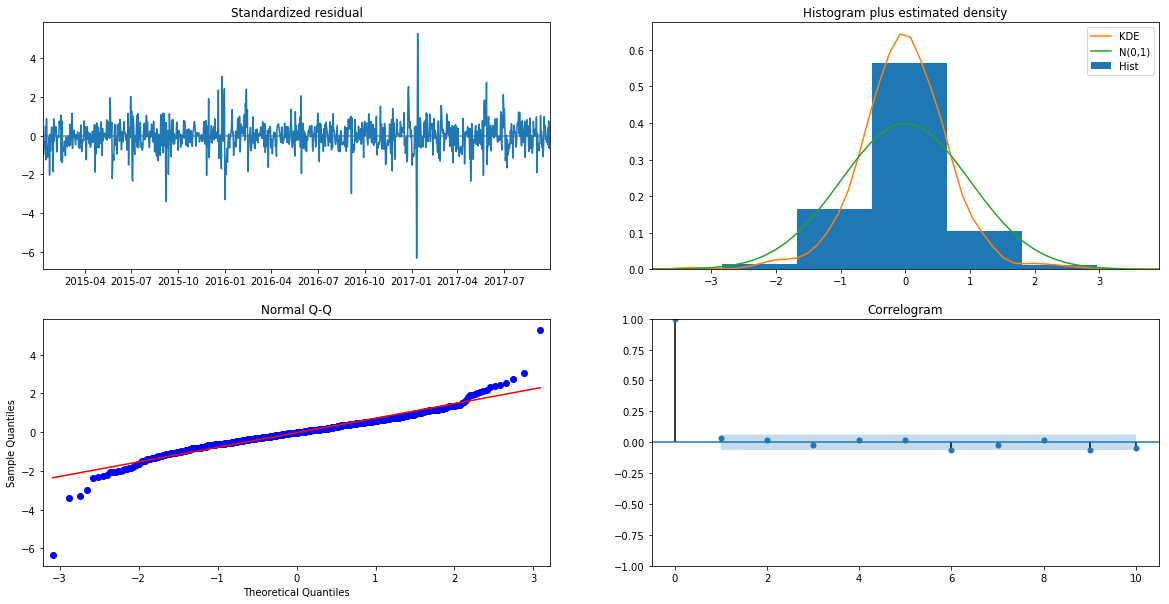

In [172]:
tvModel = sm.tsa.SARIMAX(
            endog = database_cleaned.set_index("Date")["Total Hotel Purchases"].astype(float), 
            order = (0, 1, 4), # p, d, q
            seasonal_order=(1, 1, 1, 7),
            trend = "n",
            exog= database_cleaned.set_index("Date")
            .loc[:, 
                 [
                    'Partner TOTAL',
                    'Affiliate TOTAL',
                    'Search TOTAL',
                    'TV Campaign 1',
                    'TV Campaign 2', 
                     'TV Campaign 3'
                ]
            ].astype(float), 
        ).fit()
_= sns.plt.plot(range(len(tvModel.resid)), tvModel.resid)
_= plot_acf(tvModel.resid, lags=50)
_ = plot_pacf(tvModel.resid, lags=50)
_ = tvModel.plot_diagnostics(figsize = (20, 10))
print(tvModel.summary())